# student performance project using regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\ASUS\Downloads\StudentsPerformance.csv")
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape

(1000, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
math score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


In [7]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

# Data cleaning and processing

In [8]:
df.rename(columns={'race/ethnicity':'race','parental level of education':'education','test preparation course':'test_course'},inplace=True)

In [9]:
df.head()

,gender,race,education,lunch,test_course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [10]:
df.head()

,gender,race,education,lunch,test_course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [11]:
df.columns


Index(['gender', 'race', 'education', 'lunch', 'test_course', 'math score',
       'reading score', 'writing score'],
      dtype='object')

<Axes: xlabel='race', ylabel='count'>

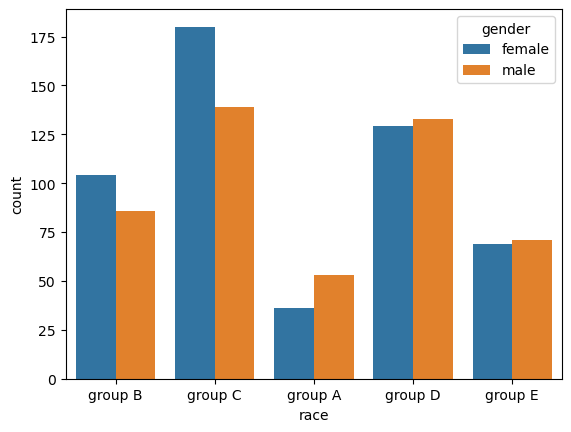

In [12]:
sns.countplot(x=df['race'],hue=df['gender'])

<Axes: xlabel='education', ylabel='count'>

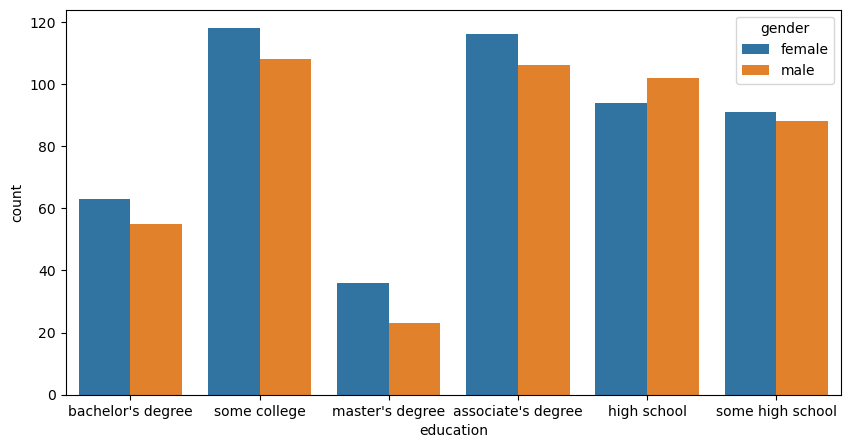

In [13]:
plt.figure(figsize=(10,5))
sns.countplot(x=df['education'],hue=df['gender'])

In [14]:
df.head(2)

,gender,race,education,lunch,test_course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


# Label Encoding

In [15]:
# label encoding

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['gender'] = le.fit_transform(df['gender'])
df['race'] = le.fit_transform(df['race'])
df['education'] = le.fit_transform(df['education'])
df['lunch'] = le.fit_transform(df['lunch'])
df['test_course'] = le.fit_transform(df['test_course'])

In [16]:
df.head()

,gender,race,education,lunch,test_course,math score,reading score,writing score
0,0,1,1,1,1,72,72,74
1,0,2,4,1,0,69,90,88
2,0,1,3,1,1,90,95,93
3,1,0,0,0,1,47,57,44
4,1,2,4,1,1,76,78,75


C:\Users\ASUS\AppData\Local\Temp\ipykernel_5208\2354272343.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['math score'])


<Axes: xlabel='math score', ylabel='Density'>

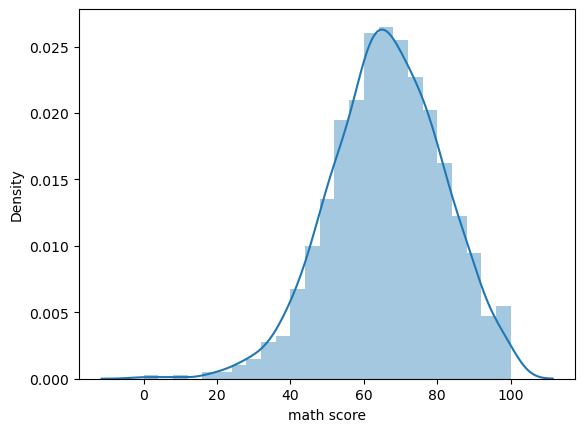

In [17]:
sns.distplot(df['math score'])

C:\Users\ASUS\AppData\Local\Temp\ipykernel_5208\232294105.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['reading score'])


<Axes: xlabel='reading score', ylabel='Density'>

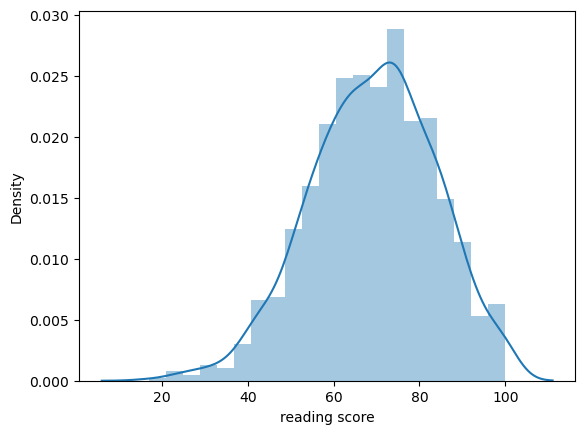

In [18]:
sns.distplot(df['reading score'])

C:\Users\ASUS\AppData\Local\Temp\ipykernel_5208\668233639.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['writing score'])


<Axes: xlabel='writing score', ylabel='Density'>

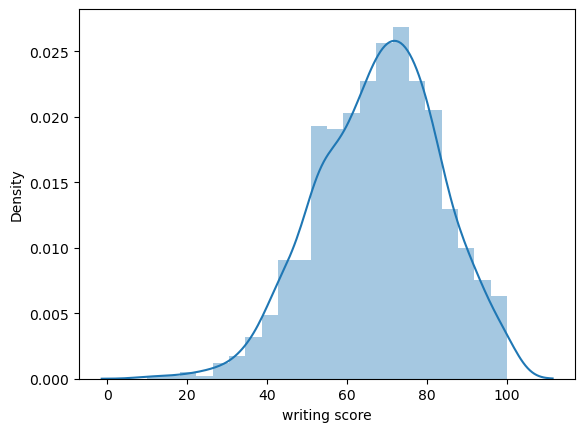

In [19]:
sns.distplot(df['writing score'])

In [20]:
df['total_score'] = df['math score'] + df['reading score'] + df['writing score']
df.head()

,gender,race,education,lunch,test_course,math score,reading score,writing score,total_score
0,0,1,1,1,1,72,72,74,218
1,0,2,4,1,0,69,90,88,247
2,0,1,3,1,1,90,95,93,278
3,1,0,0,0,1,47,57,44,148
4,1,2,4,1,1,76,78,75,229


In [21]:
df['percentage'] = df['total_score']/3

In [22]:
df.head()

,gender,race,education,lunch,test_course,math score,reading score,writing score,total_score,percentage
0,0,1,1,1,1,72,72,74,218,72.666667
1,0,2,4,1,0,69,90,88,247,82.333333
2,0,1,3,1,1,90,95,93,278,92.666667
3,1,0,0,0,1,47,57,44,148,49.333333
4,1,2,4,1,1,76,78,75,229,76.333333


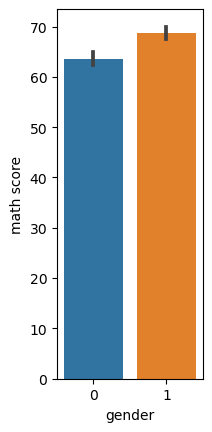

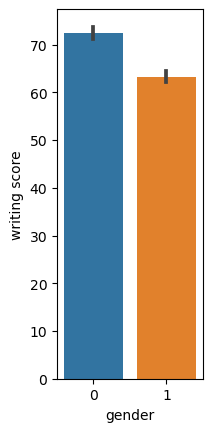

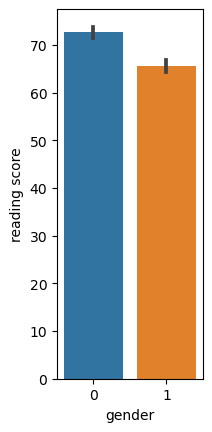

In [23]:
plt.subplot(1,3,1)
sns.barplot(x=df['gender'],y=df['math score'])
plt.show()

plt.subplot(1,3,2)
sns.barplot(x=df['gender'],y=df['writing score'])
plt.show()

plt.subplot(1,3,3)
sns.barplot(x=df['gender'],y=df['reading score'])
plt.show()


C:\Users\ASUS\AppData\Local\Temp\ipykernel_5208\3396645380.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['percentage'])


<Axes: xlabel='percentage', ylabel='Density'>

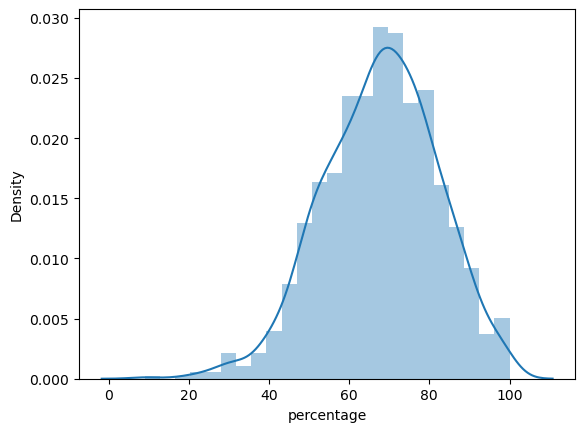

In [24]:
sns.distplot(df['percentage'])

In [25]:
df.head()

,gender,race,education,lunch,test_course,math score,reading score,writing score,total_score,percentage
0,0,1,1,1,1,72,72,74,218,72.666667
1,0,2,4,1,0,69,90,88,247,82.333333
2,0,1,3,1,1,90,95,93,278,92.666667
3,1,0,0,0,1,47,57,44,148,49.333333
4,1,2,4,1,1,76,78,75,229,76.333333


In [26]:
#spliting independant and dependant varible
x = df.drop('percentage',axis=1)
y = df['percentage']

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.6,random_state=100)

In [28]:
#model creation
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()

model.fit(x_train,y_train)

DecisionTreeRegressor()

In [29]:
#making prediction
x_train_pred = model.predict(x_train)
x_test_pred = model.predict(x_test)

In [30]:
#model evaluation
from sklearn.metrics import r2_score
print(r2_score(y_train,x_train_pred))
print(r2_score(y_test,x_test_pred))

1.0
0.9958805350717327


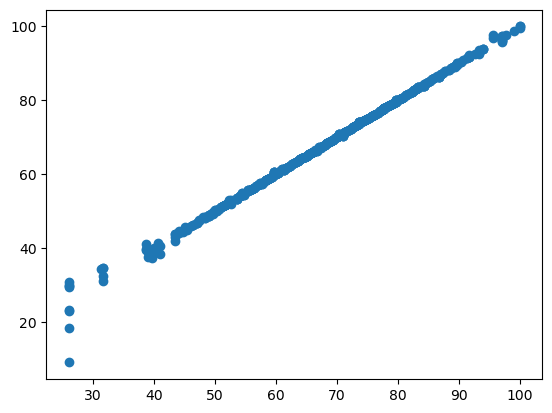

In [31]:
#visualizing our prediction accuracy
plt.scatter(x_test_pred,y_test)

In [32]:
x=df.drop("percentage",axis=1) #x define independant variable so we
y=df["percentage"] #define independant variable
print("shape of x=",x.shape)
print("shape of y=",y.shape)

shape of x= (1000, 9)
shape of y= (1000,)


In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.6,random_state=51)
print("shape of x_train=",x_train.shape)
print("shape of y_train=",y_train.shape)
print("shape of x_train=",x_train.shape)
print("shape of y_train=",y_train.shape)

shape of x_train= (400, 9)
shape of y_train= (400,)
shape of x_train= (400, 9)
shape of y_train= (400,)


# MSE RMSE

In [34]:
from sklearn.svm import SVR

In [35]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_squared_log_error

# Load the diabetes dataset
data = load_diabetes()
X = data.data
y = data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree Regressor
regressor = DecisionTreeRegressor()

# Fit the regressor on the training data
regressor.fit(X_train, y_train)

# Predict on the test data
y_pred = regressor.predict(X_test)

# Calculate MSE and RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print('MSE=',mse)
print('RMSE=',rmse)

MSE= 5441.528089887641
RMSE= 73.76671396970073


# Random forest regression

In [36]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [37]:
le.fit_transform(df["percentage"])
df["Position"]=le.fit_transform(df["percentage"])
df

,gender,race,education,lunch,test_course,math score,reading score,writing score,total_score,percentage,Position
0,0,1,1,1,1,72,72,74,218,72.666667,118
1,0,2,4,1,0,69,90,88,247,82.333333,147
2,0,1,3,1,1,90,95,93,278,92.666667,178
3,1,0,0,0,1,47,57,44,148,49.333333,48
4,1,2,4,1,1,76,78,75,229,76.333333,129
...,...,...,...,...,...,...,...,...,...,...,...
995,0,4,3,1,0,88,99,95,282,94.000000,182
996,1,2,2,0,1,62,55,55,172,57.333333,72
997,0,2,2,0,0,59,71,65,195,65.000000,95
998,0,3,4,1,0,68,78,77,223,74.333333,123


In [38]:
df =df.drop('Position',axis=1)
df

,gender,race,education,lunch,test_course,math score,reading score,writing score,total_score,percentage
0,0,1,1,1,1,72,72,74,218,72.666667
1,0,2,4,1,0,69,90,88,247,82.333333
2,0,1,3,1,1,90,95,93,278,92.666667
3,1,0,0,0,1,47,57,44,148,49.333333
4,1,2,4,1,1,76,78,75,229,76.333333
...,...,...,...,...,...,...,...,...,...,...
995,0,4,3,1,0,88,99,95,282,94.000000
996,1,2,2,0,1,62,55,55,172,57.333333
997,0,2,2,0,0,59,71,65,195,65.000000
998,0,3,4,1,0,68,78,77,223,74.333333


In [39]:
x=df.drop('writing score',axis=1)
y=df["writing score"]
print('shape of x',x.shape)
print('shape of y',y.shape)

shape of x (1000, 9)
shape of y (1000,)


In [40]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.6,random_state=2020)

print('shape of x_train', x_train.shape)

print('shape of y_train', y_train.shape)

print('shape of x_test', x_test.shape)

print('shape of y_test', y_test.shape)

shape of x_train (400, 9)
shape of y_train (400,)
shape of x_test (600, 9)
shape of y_test (600,)


In [41]:
from sklearn.ensemble import RandomForestRegressor

In [42]:
regressor=RandomForestRegressor(n_estimators=100)
regressor.fit(x_train, y_train)

RandomForestRegressor()

In [43]:
regressor.score(x_test,y_test)

0.9623537108468078

# k fold cross validation

In [75]:
from sklearn.datasets import load_digits
digits=load_digits()

In [76]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(digits.data,digits.target,test_size=0.4)

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

In [78]:
lr=LogisticRegression(solver="liblinear",multi_class="ovr")
lr.fit(x_train,y_train)
lr.score(x_test,y_test)

0.9624478442280946

# linear regression

In [48]:
x=df.drop("percentage",axis=1) #x define independant variable so we
y=df["percentage"] #define independant variable
print("shape of x=",x.shape)
print("shape of y=",y.shape)

shape of x= (1000, 9)
shape of y= (1000,)


In [49]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [50]:
lr.coef_

array([ 4.76399183e-16,  1.29367754e-01, -1.67375882e-02, -5.21851731e-03,
        3.32090165e-02, -1.07433024e-02, -4.03472773e-02,  1.20935633e-01,
        1.45173798e+00, -2.55338716e-02,  8.06701878e-02,  4.04254635e-02,
       -5.61322973e-02, -6.77094174e-02,  8.67798211e-02,  7.53505129e-02,
       -1.01055693e+00,  3.15294994e-02,  8.50281266e-02, -4.11298486e-02,
       -8.97079271e-02,  4.82448641e-02, -5.93119595e-02, -1.77147661e-01,
       -1.08289455e+00, -1.29177905e-01,  1.55149147e-02,  1.02291146e-01,
        7.83687154e-02,  1.00331089e-01, -1.33902325e-02, -2.25372707e+00,
       -1.23052610e-14, -1.58992187e-01, -1.67565285e-02,  1.39157571e-01,
       -4.53294138e-02,  3.47056299e-02, -2.16442304e-02,  1.05072201e-14,
       -3.60286448e-02,  1.25211105e-01, -2.08493778e-02, -3.89215333e-03,
        9.59281652e-02,  7.77455300e-02,  5.15639466e-03,  2.10447178e-01,
        5.79399593e-01,  5.77496398e-03, -4.13240128e-03, -5.36995592e-02,
       -1.91722958e-01, -

In [51]:
lr.intercept_

3.4625853717333612

# ridge and lasso

In [52]:
from sklearn.linear_model import Ridge ,Lasso

In [53]:
rd=Ridge()
rd.fit(x_train,y_train)
rd.score(x_test,y_test)

0.5859810436065991

In [54]:
ls=Lasso()
ls.fit(x_train,y_train)
ls.score(x_test,y_test)

0.45338641880294905

In [55]:
rd2=Ridge(alpha=2)
rd2.fit(x_train,y_train)
rd2.score(x_test,y_test)

0.5855789054502227

In [56]:
ls2=Lasso(alpha=2)
ls2.fit(x_train,y_train)
ls2.score(x_test,y_test)

0.3274576222321771